<a href="https://colab.research.google.com/github/steeze1213/Deep-learning-practice/blob/main/8/practice8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>C8 이미지를 위한 인공 신경망</h1>
<h2>2. 합성곱 신경망을 사용한 이미지 분류</h2>
<h3>패션 MNIST 데이터 불러오기</h3>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


<h3>합성곱 신경망 만들기</h3>

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

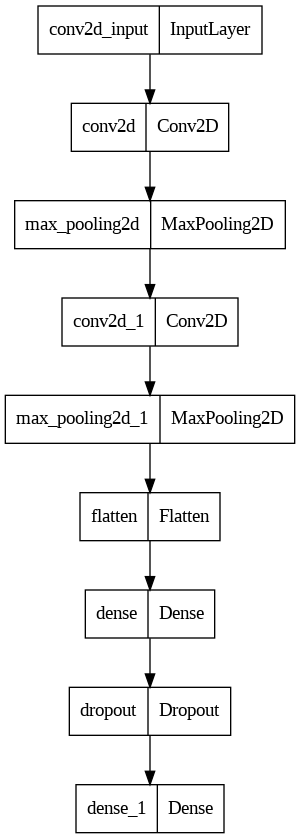

In [ ]:
keras.utils.plot_model(model)

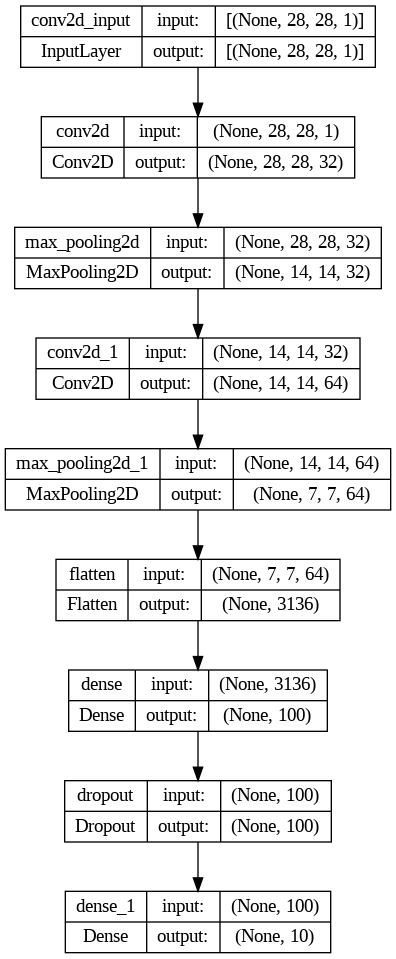

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

<h3>모델 컴파일과 훈련</h3>

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 65s 42ms/step - loss: 0.5375 - accuracy: 0.8069 - val_loss: 0.3475 - val_accuracy: 0.8733
Epoch 2/20
   3/1500 [..............................] - ETA: 50s - loss: 0.4395 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 62s 41ms/step - loss: 0.3539 - accuracy: 0.8737 - val_loss: 0.2812 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3024 - accuracy: 0.8913 - val_loss: 0.2644 - val_accuracy: 0.9020
Epoch 4/20
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2711 - accuracy: 0.9026 - val_loss: 0.2459 - val_accuracy: 0.9088
Epoch 5/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2458 - accuracy: 0.9120 - val_loss: 0.2367 - val_accuracy: 0.9119
Epoch 6/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2281 - accuracy: 0.9158 - val_loss: 0.2303 - val_accuracy: 0.9153
Epoch 7/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.2093 - accuracy: 0.9223 - val_loss: 0.2217 - val_accuracy: 0.9195
Epoch 8/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.1953 - accuracy: 0.9282 - val_loss: 0.2224 - val_accura

In [ ]:
import matplotlib.pyplot as plt

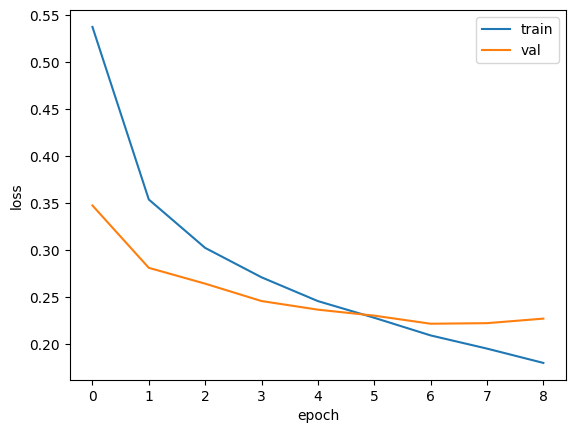

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 16ms/step - loss: 0.2217 - accuracy: 0.9195


[0.2217467874288559, 0.9194999933242798]

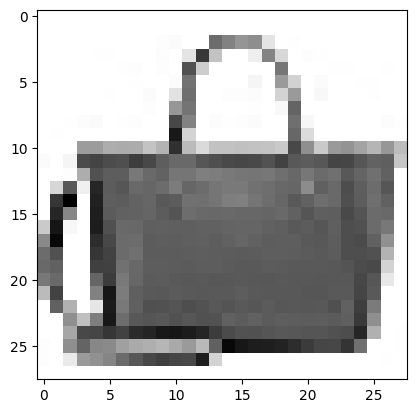

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 173ms/step
[[1.9662335e-17 7.7391996e-24 8.1961050e-18 1.7593017e-18 4.5342732e-16
  2.2288227e-19 8.6418130e-15 6.1926918e-19 1.0000000e+00 2.7092299e-18]]


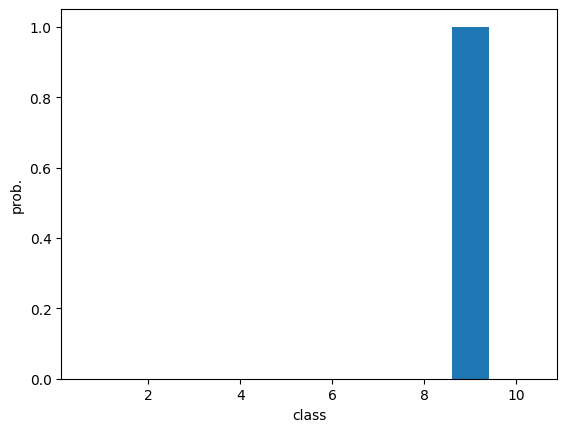

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2513 - accuracy: 0.9131


[0.25129032135009766, 0.913100004196167]